# Proposed Opening Operation:

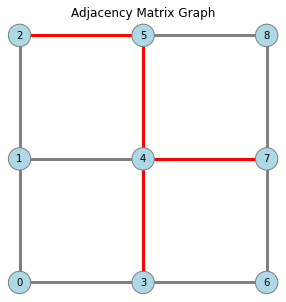

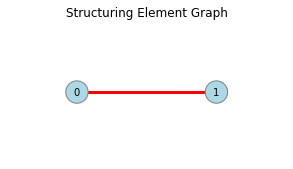

In [35]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Initialize a grid graph with 9 nodes
G = nx.grid_2d_graph(3, 3)

# Create a layout for the graph
pos_adj = {(x, y): (x, y) for x, y in G.nodes()}  # Mapping of nodes to positions
nx.set_node_attributes(G, pos_adj, 'pos')  # Set 'pos' attribute for nodes

# This is done so that both the null grid and G_adj graph have the same node labels
G = nx.convert_node_labels_to_integers(
    G, ordering='sorted', label_attribute='origin'
)

# Example adjacency matrix
adj_matrix = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 0, 1, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
])

structuring_element = np.array([
    [0, 1],
    [1, 0]
])

# Graph from adjacency matrix
G_adj = nx.from_numpy_matrix(adj_matrix)

# Get edges from the adjacency matrix
edges = G_adj.edges()

# Set node color and edge color for nodes and edges in the adjacency matrix
node_color_adj = ['lightblue' if i in range(len(adj_matrix)) else 'lightgray' for i in range(G.number_of_nodes())]
edge_color_adj = ['red' if edge in edges else 'gray' for edge in G.edges()]
pos_adj = nx.get_node_attributes(G, 'pos')

# Draw the adjacency matrix graph
plt.figure(figsize=(5, 5))
plt.title("Adjacency Matrix Graph")
nx.draw(
    G, pos=pos_adj, with_labels=True, edgecolors="tab:gray", node_color=node_color_adj,
    node_size=500, font_size=10, edge_color=edge_color_adj, width=3
)
plt.gca().set_aspect('equal')
plt.savefig('plot1.png')
plt.show()

# Create a grid graph with 2 rows and 1 column
G2 = nx.grid_2d_graph(2, 1)

# Create a layout for the graph
pos_s = {(x, y): (x, y) for x, y in G2.nodes()}  # Mapping of nodes to positions
nx.set_node_attributes(G2, pos_s, 'pos')  # Set 'pos' attribute for nodes

# This is done so that both the null grid and G_str graph have the same node labels
G2 = nx.convert_node_labels_to_integers(
    G2, ordering='sorted', label_attribute='origin'
)

# Create graph G_str from the structuring element
G_str = nx.from_numpy_matrix(structuring_element)

# Set node and edge colors for G_str
node_color_str = ['lightblue' for _ in G_str.nodes()]
edge_color_str = ['red' for _ in G_str.edges()]
pos_s = nx.get_node_attributes(G2, 'pos')

# Draw the structuring element graph
plt.figure(figsize=(5, 5))
plt.title("Structuring Element Graph")
nx.draw(
    G2, pos=pos_s, with_labels=True, edgecolors="tab:gray", node_color=node_color_str,
    node_size=500, font_size=10, edge_color=edge_color_str, width=3
)
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 0.5])
plt.gca().set_aspect('equal')
plt.savefig('plot2.png')
plt.show()

In [36]:
result_edges = []

#pos_adj_inverse
pos_adj_inv = {v: k for k, v in pos_adj.items()}

#get last node in the adj_matrix to define stopping point
adj_nodes = [(pos_adj[u]) for u in list(G.nodes())]
adj_last_node = adj_nodes[-1]

#To get nodes in the structuring element
str_nodes = [(pos_s[u]) for u in list(G2.nodes())]
# print("str_nodes: ",str_nodes)

#To get connected edges in the structuring element
str_elem_edges = [(pos_s[u],pos_s[v]) for u,v in G_str.edges()]
# print("str_elem_edges: ",str_elem_edges)
start_str_elem_edges = str_elem_edges #stored for use in while loop

#initial position values for the str element in adj_matrix
#sub_graph of adj matrix
sub_list = []
sub_list_pos = []
for j in str_nodes:
    for k,l in pos_adj.items():
        if(j == l):
            sub_list.append(k)
            sub_list_pos.append(l)

# print("sub_list_pos: ",sub_list_pos) #sub_graph_pos of adj matrix
# print("sub_list: ",sub_list) #sub_graph of adj matrix

#initial position values for the str element edges in adj matrix
str_elem_adj_edges = [(pos_adj_inv[edge[0]], pos_adj_inv[edge[1]]) for edge in str_elem_edges]
# print("str_elem_adj_edges: ",str_elem_adj_edges)

#defining for proper mvement
start_l = sub_list_pos
start_node = sub_list_pos[0]
end_node = sub_list_pos[-1]
# print("initial start_node: ",start_node)
# print("initial end node: ",end_node)

while(end_node != adj_last_node):#vertical
    
    #sub_graph_edges compared with str_elem_edges
    G_sub = G_adj.subgraph(sub_list)
    sub_edges = list(G_sub.edges())
    sub_edges_set = set(tuple(sorted(edge)) for edge in sub_edges)
    str_elem_adj_edges_set = set(tuple(sorted(edge)) for edge in str_elem_adj_edges)
    #check if all values in str_elem_et are in the subset
    edge_flag = all(i in sub_edges_set for i in str_elem_adj_edges_set)
    if(edge_flag):
        result_edges.extend(list(str_elem_adj_edges_set))
#     print("matching result: ",result_edges)
    
    while(end_node[0] != adj_last_node[0]): # horizontal
        #moving horizontally
        sub_list_pos = [(i + 1, j) for (i, j) in sub_list_pos]
        start_node = sub_list_pos[0]
#         print("in: ",sub_list_pos)
        end_node = sub_list_pos[-1]
        
        #updating sub_list moving horizontally based on new sub_list_pos and converting in form so that it can be compared
        sub_list = [pos_adj_inv[edge] for edge in sub_list_pos]
#         print("sub_list: ",sub_list)
        
        #updated str_lem nodes moving horizontally
        str_elem_edges = [((i + 1, j), (k + 1, l)) for ((i, j), (k, l)) in str_elem_edges]
        #converted in proper form for comparision
        str_elem_adj_edges = [(pos_adj_inv[edge[0]], pos_adj_inv[edge[1]]) for edge in str_elem_edges]
#         print("str_elem_adj_edges: ",str_elem_adj_edges)
        
        #sub_graph_edges compared with str_elem_edges
        G_sub = G_adj.subgraph(sub_list)
        sub_edges = list(G_sub.edges())
        sub_edges_set = set(tuple(sorted(edge)) for edge in sub_edges)
        str_elem_adj_edges_set = set(tuple(sorted(edge)) for edge in str_elem_adj_edges)
        #check if all values in str_elem_et are in the subset
        edge_flag = all(i in sub_edges_set for i in str_elem_adj_edges_set)
        if(edge_flag):
            result_edges.extend(list(str_elem_adj_edges_set))
#         print("matching result: ",result_edges)  
     
    #if this is the last block stop here
    if(end_node == adj_last_node):
        break
        
    #reset to start position and then increment vertically
    sub_list_pos = start_l
    sub_list_pos = [(i,j + 1) for (i,j) in sub_list_pos]
    end_node = sub_list_pos[-1]
    start_l = sub_list_pos #this is the new start element now
#     print("out: ",sub_list_pos)
    
    #updating sub_list moving vertically based on new sub_list_pos and converting in proper form using pos_adj_inv dict 
    sub_list = [pos_adj_inv[edge] for edge in sub_list_pos]
#     print("sub_list: ",sub_list)
    
    #reset to start position and then increment
    str_elem_edges = start_str_elem_edges
    str_elem_edges = [((i, j + 1), (k, l + 1)) for ((i, j), (k, l)) in str_elem_edges]
    
    #updated str elem edges based on adj matrix
    str_elem_adj_edges = [(pos_adj_inv[edge[0]], pos_adj_inv[edge[1]]) for edge in str_elem_edges]
#     print("str_elem_adj_edges: ",str_elem_adj_edges)
    start_str_elem_edges = str_elem_edges #this is the new start element now

print("result_edges: ",result_edges)

result_edges:  [(4, 7), (2, 5)]


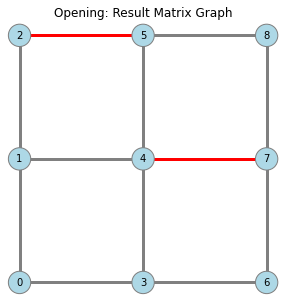

In [37]:
import numpy as np

# Dimensions of the matrices
m, n = adj_matrix.shape
k, l = structuring_element.shape

# Initialize the result matrix with zeros
result_matrix = np.zeros((m, n))

# Graph from adjacency matrix
G_adj = nx.from_numpy_matrix(result_matrix)

# Set node color and edge color for nodes and edges in the adjacency matrix
node_color_adj = ['lightblue' if i in range(len(result_matrix)) else 'lightgray' for i in range(G.number_of_nodes())]
edge_color_adj = ['red' if edge in result_edges else 'gray' for edge in G.edges()]
pos_adj = nx.get_node_attributes(G, 'pos')

# Draw the adjacency matrix graph
plt.figure(figsize=(5, 5))
plt.title("Opening: Result Matrix Graph")
nx.draw(
    G, pos=pos_adj, with_labels=True, edgecolors="tab:gray", node_color=node_color_adj,
    node_size=500, font_size=10, edge_color=edge_color_adj, width=3
)
plt.gca().set_aspect('equal')
plt.show()

# START

# Erosion:

In erosion we match the entire structuring element with the subgraph and then only keep the structuring element. We will be randomly selecting the origin from the structuring element. we will use the same structuring element to perform erosion and dilation so that origin remains constant throught the opening or closing operation later.

In order to perform erosion and dilation to get the opening result we can consider any edge or node as the origin point. this iterates throughout the grpahs taking each sub graph into account and matching it with the structuring element. Once matched the origin is kept and rest is removed. 

This eroded graph is then used as an input to dilation step and we get the desired opening result.

This is then compared with our resulting graph to check if our method is correct to generate opening graph directly.

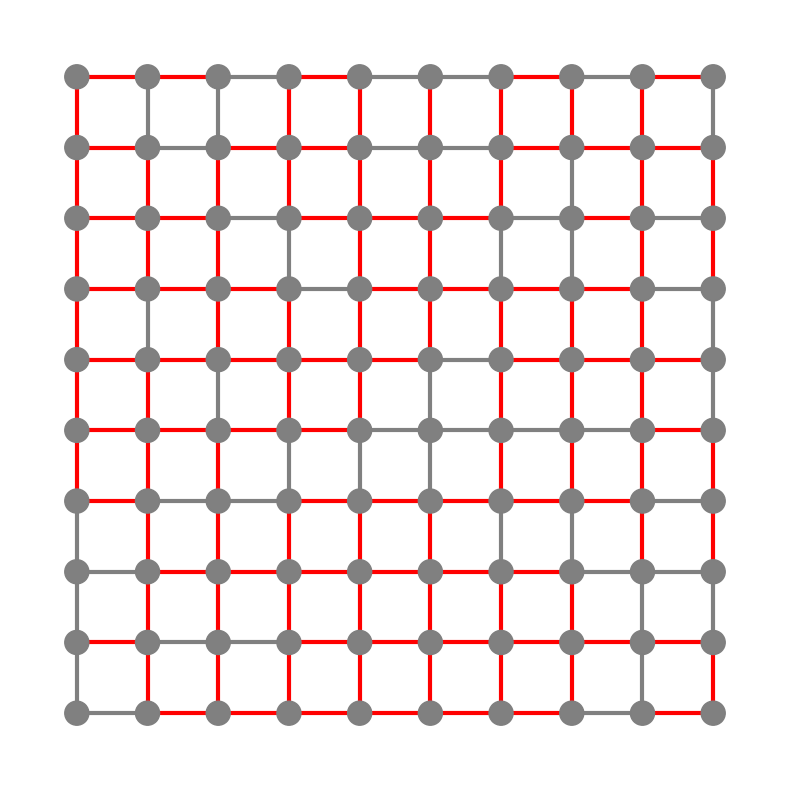

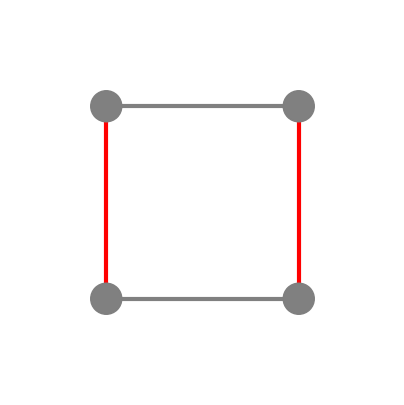

In [84]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# adj_foldername = "erosion/adjacency_matrix"
# str_foldername = "erosion/structuring_elem"
# open_foldername = "erosion/opening_result"

# # Create the folder if it doesn't exist
# if not os.path.exists(adj_foldername):
#     os.makedirs(adj_foldername)
# if not os.path.exists(str_foldername):
#     os.makedirs(str_foldername)
# if not os.path.exists(open_foldername):
#     os.makedirs(open_foldername)

# # to save 100 photos 
# for file in range(0,100):
    
n = 10  # Grid size
# Initialize a grid graph with 100 nodes
G = nx.grid_2d_graph(n, n)

# Create a layout for the graph
pos_adj_b = {(x, y): (x, y) for x, y in G.nodes()}  # Mapping of nodes to positions
nx.set_node_attributes(G, pos_adj_b, 'pos')  # Set 'pos' attribute for nodes


# This is done so that both the null grid and G_adj graph have the same node labels
G = nx.convert_node_labels_to_integers(
    G, ordering='sorted', label_attribute='origin'
)

adj_matrix = np.zeros((n*n, n*n), dtype=int)  # Initialize adjacency matrix

#Random generator for adj_matrix
# Generate at least one edge
while np.sum(adj_matrix) == 0:
    for i in range(n):
        for j in range(n):
            node = i * n + j  # Node index in the adjacency matrix

            # Check neighboring nodes and add edges randomly
            if i > 0 and np.random.rand() < 0.5:
                adj_matrix[node, node - n] = 1  # Add edge to node above
            if i < n - 1 and np.random.rand() < 0.5:
                adj_matrix[node, node + n] = 1  # Add edge to node below
            if j > 0 and np.random.rand() < 0.5:
                adj_matrix[node, node - 1] = 1  # Add edge to node on the left
            if j < n - 1 and np.random.rand() < 0.5:
                adj_matrix[node, node + 1] = 1  # Add edge to node on the right

adj_matrix = np.array(adj_matrix)  

ns = 2 # Str_elem Grid size

structuring_element = np.zeros((ns*ns, ns*ns), dtype=int)

while np.sum(structuring_element) == 0:
    for i in range(ns):
        for j in range(ns):
            node = i * ns + j  # Node index in the strturing element

            # Check neighboring nodes and add edges randomly
            if i > 0 and np.random.rand() < 0.5:
                structuring_element[node, node - ns] = 1  # Add edge to node above
            if i < ns - 1 and np.random.rand() < 0.5:
                structuring_element[node, node + ns] = 1  # Add edge to node below
            if j > 0 and np.random.rand() < 0.5:
                structuring_element[node, node - 1] = 1  # Add edge to node on the left
            if j < ns - 1 and np.random.rand() < 0.5:
                structuring_element[node, node + 1] = 1  # Add edge to node on the right

structuring_element = np.array(structuring_element)

# Graph from adjacency matrix
G_adj = nx.from_numpy_matrix(adj_matrix)

# Get edges from the adjacency matrix
edges_adj = G_adj.edges()

# Set node color and edge color for nodes and edges in the adjacency matrix
node_color_adj = ['gray' if i in range(len(adj_matrix)) else 'lightgray' for i in range(G.number_of_nodes())]
edge_color_adj = ['red' if edge in edges_adj else 'gray' for edge in G.edges()]
pos_adj = nx.get_node_attributes(G, 'pos')

# Draw the adjacency matrix graph
plt.figure(figsize=(10, 10))
# plt.title("Adjacency Matrix Graph")
nx.draw_networkx(
    G, pos=pos_adj, with_labels=False, edgecolors="tab:gray", node_color=node_color_adj,
    node_size=300, font_size=10, edge_color=edge_color_adj, width=3
)
plt.box(False)
plt.gca().set_aspect('equal')
# # Save the graph as an image with a specific name and folder
# filename = f"{adj_foldername}/adj_matrix_{file}.png"
# plt.savefig(filename)
plt.show()

# Create a grid graph with 2 rows and 2 column
G2 = nx.grid_2d_graph(2, 2)

# Create a layout for the graph
pos_s_b = {(x, y): (x, y) for x, y in G2.nodes()}  # Mapping of nodes to positions
nx.set_node_attributes(G2, pos_s_b, 'pos')  # Set 'pos' attribute for nodes

# This is done so that both the null grid and G_str graph have the same node labels
G2 = nx.convert_node_labels_to_integers(
    G2, ordering='sorted', label_attribute='origin'
)

# Create graph G_str from the structuring element
G_str = nx.from_numpy_matrix(structuring_element)
edges_str = G_str.edges()

#defined the origin

origin = [edges_str_list[0]]

# Set node and edge colors for G_str
node_color_str = ['gray' for _ in G_str.nodes()]
edge_color_str = ['red' if edge in edges_str else 'gray' for edge in G2.edges()]
pos_s = nx.get_node_attributes(G2, 'pos')

# Draw the structuring element graph
plt.figure(figsize=(5, 5))
# plt.title("Structuring Element Graph")
nx.draw_networkx(
    G2, pos=pos_s, with_labels=False, edgecolors="tab:gray", node_color=node_color_str,
    node_size=500, font_size=10, edge_color=edge_color_str, width=3
)
plt.box(False)
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.gca().set_aspect('equal')
# # Save the graph as an image with a specific name and folder
# filename = f"{str_foldername}/str_elem_{file}.png"
# plt.savefig(filename)
plt.show()

In [56]:
origin

[(1, 3)]

Eroded_matix: 


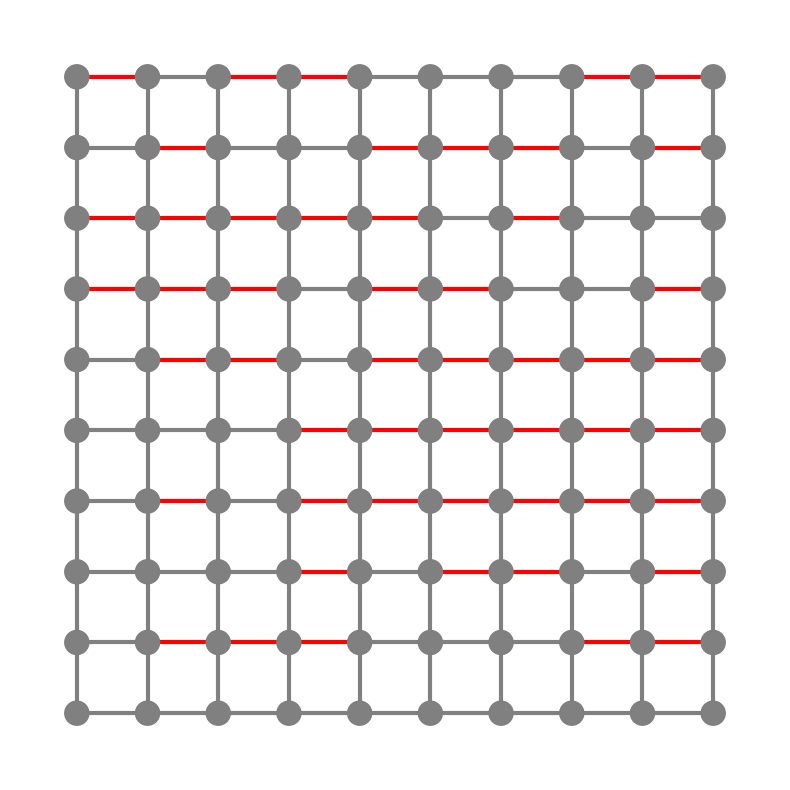

Dilated_matix: 


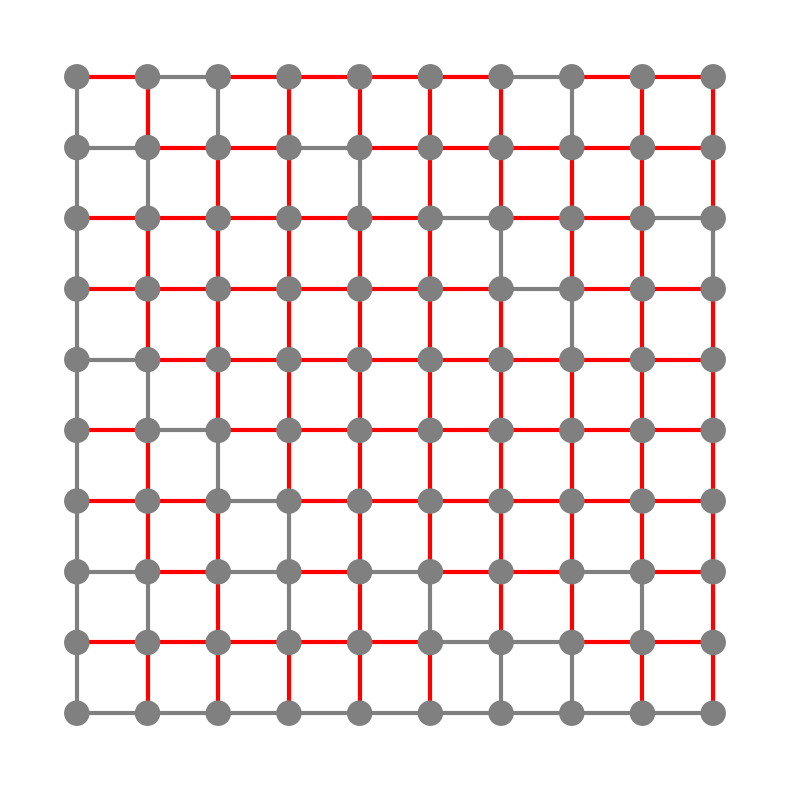

Opening_matrix: 


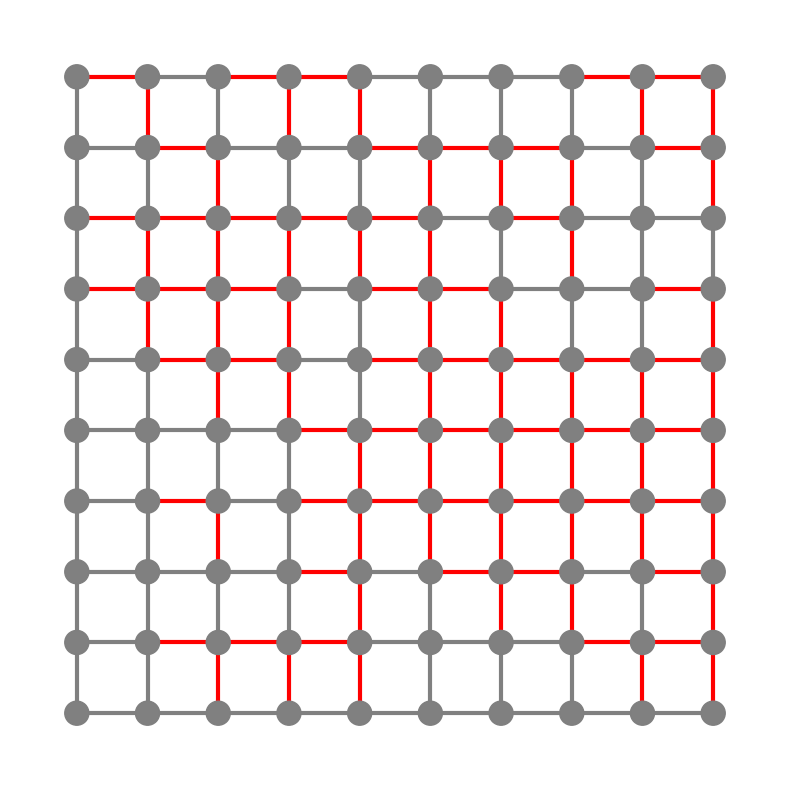

Closing_matrix: 


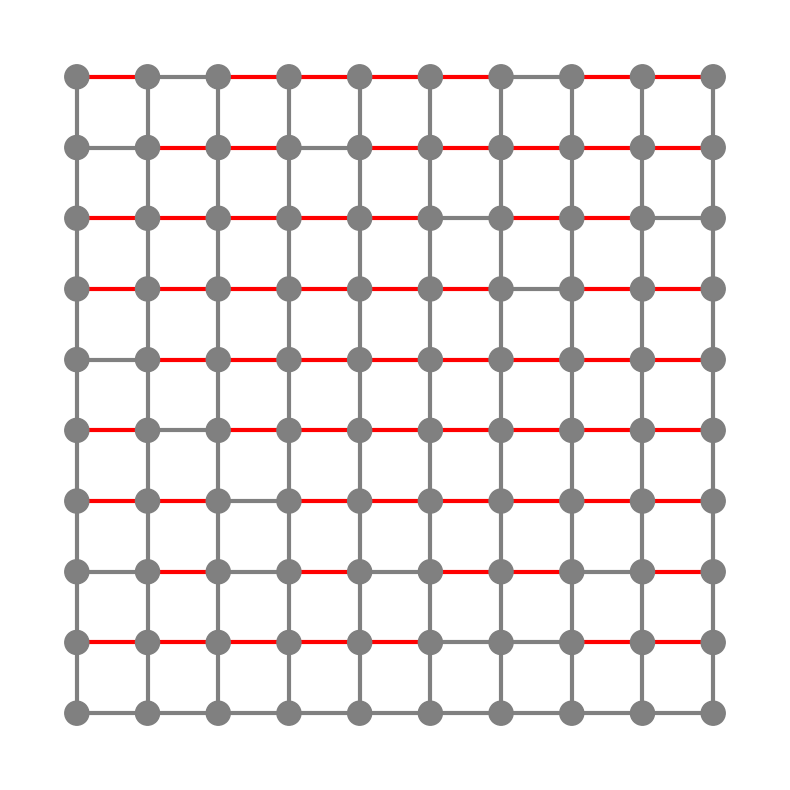

In [59]:
print("Eroded_matix: ")
result_edges_erosion = Erosion(pos_adj, G, G2, G_str, origin, G_adj)
#result of erosion on original graph
Result_matrix(G, adj_matrix, structuring_element, result_edges_erosion)

print("Dilated_matix: ")
result_edges_dilation = Dilation(pos_adj, G, G2, G_str, origin, G_adj)
#result of dilation on original graph
Result_matrix(G, adj_matrix, structuring_element, result_edges_dilation)

print("Opening_matrix: ")
#eroded graph is created and passed to dilation step to perform opening operation
eroded_adj_matrix = create_adjacency_matrix(result_edges_erosion, n)#n is taken from above 
G_eroded = nx.from_numpy_matrix(eroded_adj_matrix)
result_edges_opening = Dilation(pos_adj, G, G2, G_str, origin, G_eroded)
Result_matrix(G, adj_matrix, structuring_element, result_edges_opening)

print("Closing_matrix: ")
#dilated graph is created and passed to eroded step to perform closing operation
dilated_adj_matrix = create_adjacency_matrix(result_edges_dilation, n)#n is taken from above 
G_dilated = nx.from_numpy_matrix(dilated_adj_matrix)
result_edges_closing = Erosion(pos_adj, G, G2, G_str, origin, G_dilated)
Result_matrix(G, adj_matrix, structuring_element, result_edges_closing)

In [54]:
def create_adjacency_matrix(result_edges, num_vertices):
    # Initialize an empty n x n adjacency matrix
    adjacency_matrix = np.zeros((num_vertices*num_vertices, num_vertices*num_vertices), dtype=int)

    # Fill in the adjacency matrix
    for edge in result_edges:
        source, destination = edge
        adjacency_matrix[source][destination] = 1
        # If the graph is undirected, you can also set the symmetric edge
        # adjacency_matrix[destination][source] = 1

    return adjacency_matrix

In [37]:
def Erosion(pos_adj, G, G2, G_str, origin, G_adj):

    result_edges = []

    #pos_adj_inverse
    pos_adj_inv = {v: k for k, v in pos_adj.items()}

    #get last node in the adj_matrix to define stopping point
    adj_nodes = [(pos_adj[u]) for u in list(G.nodes())]
    adj_last_node = adj_nodes[-1]

    #To get nodes in the structuring element
    str_nodes = [(pos_s[u]) for u in list(G2.nodes())]

    #To get connected edges in the structuring element
    str_elem_edges = [(pos_s[u],pos_s[v]) for u,v in G_str.edges()]
    #initial position values for the str element in adj_matrix
    start_str_elem_edges = str_elem_edges #stored for use in while loop

    origin_edges = [(pos_s[u],pos_s[v]) for u,v in origin]
    start_origin_edges = origin_edges

    #sub_graph of adj matrix
    sub_list = []
    sub_list_pos = []
    for j in str_nodes:
        for k,l in pos_adj.items():
            if(j == l):
                sub_list.append(k)
                sub_list_pos.append(l)

    #initial position values for the str element edges in adj matrix
    str_elem_adj_edges = [(pos_adj_inv[edge[0]], pos_adj_inv[edge[1]]) for edge in str_elem_edges]
    origin_adj_edges = [(pos_adj_inv[edge[0]], pos_adj_inv[edge[1]]) for edge in origin_edges]

    #defining for proper mvement
    start_l = sub_list_pos
    start_node = sub_list_pos[0]
    end_node = sub_list_pos[-1]

    while(end_node != adj_last_node):#vertical

        #sub_graph_edges compared with str_elem_edges
        G_sub = G_adj.subgraph(sub_list)
        sub_edges = list(G_sub.edges())

        #created sets in order to remove duplicates and sort them in same order
        sub_edges_set = set(tuple(sorted(edge)) for edge in sub_edges)
        str_elem_adj_edges_set = set(tuple(sorted(edge)) for edge in str_elem_adj_edges)
        origin_adj_edges_set = set(tuple(sorted(edge)) for edge in origin_adj_edges)

        #check if all values in str_elem_et are in the subset
        edge_flag = all(i in sub_edges_set for i in str_elem_adj_edges_set)
        if(edge_flag):
            result_edges.extend(list(origin_adj_edges_set))

        while(end_node[0] != adj_last_node[0]): # horizontal
            #moving horizontally
            sub_list_pos = [(i + 1, j) for (i, j) in sub_list_pos]
            start_node = sub_list_pos[0]
            end_node = sub_list_pos[-1]

            #updating sub_list moving horizontally based on new sub_list_pos and converting in form so that it can be compared
            sub_list = [pos_adj_inv[edge] for edge in sub_list_pos]

            #updated str_lem nodes moving horizontally
            str_elem_edges = [((i + 1, j), (k + 1, l)) for ((i, j), (k, l)) in str_elem_edges]
            origin_edges = [((i + 1, j), (k + 1, l)) for ((i, j), (k, l)) in origin_edges]
            #converted in proper form for comparision
            str_elem_adj_edges = [(pos_adj_inv[edge[0]], pos_adj_inv[edge[1]]) for edge in str_elem_edges]
            origin_adj_edges = [(pos_adj_inv[edge[0]], pos_adj_inv[edge[1]]) for edge in origin_edges]

            #sub_graph_edges compared with str_elem_edges
            G_sub = G_adj.subgraph(sub_list)
            sub_edges = list(G_sub.edges())
            sub_edges_set = set(tuple(sorted(edge)) for edge in sub_edges)
            str_elem_adj_edges_set = set(tuple(sorted(edge)) for edge in str_elem_adj_edges)
            origin_adj_edges_set = set(tuple(sorted(edge)) for edge in origin_adj_edges)

            #check if all values in str_element are in the subset
            edge_flag = all(i in sub_edges_set for i in str_elem_adj_edges_set)
            if(edge_flag):
                result_edges.extend(list(origin_adj_edges_set)) 

        #if this is the last block stop here
        if(end_node == adj_last_node):
            break

        #reset to start position and then increment vertically
        sub_list_pos = start_l
        sub_list_pos = [(i,j + 1) for (i,j) in sub_list_pos]
        end_node = sub_list_pos[-1]
        start_l = sub_list_pos #this is the new start element now

        #updating sub_list moving vertically based on new sub_list_pos and converting in proper form using pos_adj_inv dict 
        sub_list = [pos_adj_inv[edge] for edge in sub_list_pos]

        #reset to start position and then increment for str_elem
        str_elem_edges = start_str_elem_edges
        str_elem_edges = [((i, j + 1), (k, l + 1)) for ((i, j), (k, l)) in str_elem_edges]

        #reset to start position and then increment for origin
        origin_edges = start_origin_edges
        origin_edges = [((i, j + 1), (k, l + 1)) for ((i, j), (k, l)) in origin_edges]

        #updated str elem edges based on adj matrix
        str_elem_adj_edges = [(pos_adj_inv[edge[0]], pos_adj_inv[edge[1]]) for edge in str_elem_edges]
        start_str_elem_edges = str_elem_edges #this is the new start element now

        #updated origin edges based on adj matrix
        origin_adj_edges = [(pos_adj_inv[edge[0]], pos_adj_inv[edge[1]]) for edge in origin_edges]
        start_origin_edges = origin_edges

    return result_edges

In [46]:
def Dilation(pos_adj, G, G2, G_str, origin, G_adj):
    result_edges = []

    #pos_adj_inverse
    pos_adj_inv = {v: k for k, v in pos_adj.items()}

    #get last node in the adj_matrix to define stopping point
    adj_nodes = [(pos_adj[u]) for u in list(G.nodes())]
    adj_last_node = adj_nodes[-1]

    #To get nodes in the structuring element
    str_nodes = [(pos_s[u]) for u in list(G2.nodes())]
    # print("str_nodes: ",str_nodes)

    #To get connected edges in the structuring element
    str_elem_edges = [(pos_s[u],pos_s[v]) for u,v in G_str.edges()]
    # print("str_elem_edges: ",str_elem_edges)
    start_str_elem_edges = str_elem_edges #stored for use in while loop

    origin_edges = [(pos_s[u],pos_s[v]) for u,v in origin]
    start_origin_edges = origin_edges

    #initial position values for the str element in adj_matrix
    #sub_graph of adj matrix
    sub_list = []
    sub_list_pos = []
    for j in str_nodes:
        for k,l in pos_adj.items():
            if(j == l):
                sub_list.append(k)
                sub_list_pos.append(l)

    # print("sub_list_pos: ",sub_list_pos) #sub_graph_pos of adj matrix
    # print("sub_list: ",sub_list) #sub_graph of adj matrix

    #initial position values for the str element edges in adj matrix
    str_elem_adj_edges = [(pos_adj_inv[edge[0]], pos_adj_inv[edge[1]]) for edge in str_elem_edges]
    origin_adj_edges = [(pos_adj_inv[edge[0]], pos_adj_inv[edge[1]]) for edge in origin_edges]
    # print("str_elem_adj_edges: ",str_elem_adj_edges)

    #defining for proper mvement
    start_l = sub_list_pos
    start_node = sub_list_pos[0]
    end_node = sub_list_pos[-1]
    # print("initial start_node: ",start_node)
    # print("initial end node: ",end_node)

    while(end_node != adj_last_node):#vertical

        #sub_graph_edges compared with str_elem_edges
        G_sub = G_adj.subgraph(sub_list)
        sub_edges = list(G_sub.edges())

        #created sets in order to remove duplicates and sort them in same order
        sub_edges_set = set(tuple(sorted(edge)) for edge in sub_edges)
        str_elem_adj_edges_set = set(tuple(sorted(edge)) for edge in str_elem_adj_edges)
        origin_adj_edges_set = set(tuple(sorted(edge)) for edge in origin_adj_edges)

        #check if all values in str_elem_et are in the subset
        edge_flag = all(i in sub_edges_set for i in origin_adj_edges_set)
        if(edge_flag):
            result_edges.extend(list(str_elem_adj_edges_set))
    #     print("matching result: ",result_edges)

        while(end_node[0] != adj_last_node[0]): # horizontal
            #moving horizontally
            sub_list_pos = [(i + 1, j) for (i, j) in sub_list_pos]
            start_node = sub_list_pos[0]
    #         print("in: ",sub_list_pos)
            end_node = sub_list_pos[-1]

            #updating sub_list moving horizontally based on new sub_list_pos and converting in form so that it can be compared
            sub_list = [pos_adj_inv[edge] for edge in sub_list_pos]
    #         print("sub_list: ",sub_list)

            #updated str_lem nodes moving horizontally
            str_elem_edges = [((i + 1, j), (k + 1, l)) for ((i, j), (k, l)) in str_elem_edges]
            origin_edges = [((i + 1, j), (k + 1, l)) for ((i, j), (k, l)) in origin_edges]
            #converted in proper form for comparision
            str_elem_adj_edges = [(pos_adj_inv[edge[0]], pos_adj_inv[edge[1]]) for edge in str_elem_edges]
            origin_adj_edges = [(pos_adj_inv[edge[0]], pos_adj_inv[edge[1]]) for edge in origin_edges]
    #         print("str_elem_adj_edges: ",str_elem_adj_edges)

            #sub_graph_edges compared with str_elem_edges
            G_sub = G_adj.subgraph(sub_list)
            sub_edges = list(G_sub.edges())
            sub_edges_set = set(tuple(sorted(edge)) for edge in sub_edges)
            str_elem_adj_edges_set = set(tuple(sorted(edge)) for edge in str_elem_adj_edges)
            origin_adj_edges_set = set(tuple(sorted(edge)) for edge in origin_adj_edges)

            #check if all values in str_elem_et are in the subset
            edge_flag = all(i in sub_edges_set for i in origin_adj_edges_set)
            if(edge_flag):
                result_edges.extend(list(str_elem_adj_edges_set))
    #         print("matching result: ",result_edges)  

        #if this is the last block stop here
        if(end_node == adj_last_node):
            break

        #reset to start position and then increment vertically
        sub_list_pos = start_l
        sub_list_pos = [(i,j + 1) for (i,j) in sub_list_pos]
        end_node = sub_list_pos[-1]
        start_l = sub_list_pos #this is the new start element now
    #     print("out: ",sub_list_pos)

        #updating sub_list moving vertically based on new sub_list_pos and converting in proper form using pos_adj_inv dict 
        sub_list = [pos_adj_inv[edge] for edge in sub_list_pos]
    #     print("sub_list: ",sub_list)

        #reset to start position and then increment for str_elem
        str_elem_edges = start_str_elem_edges
        str_elem_edges = [((i, j + 1), (k, l + 1)) for ((i, j), (k, l)) in str_elem_edges]

        #reset to start position and then increment for origin
        origin_edges = start_origin_edges
        origin_edges = [((i, j + 1), (k, l + 1)) for ((i, j), (k, l)) in origin_edges]

        #updated str elem edges based on adj matrix
        str_elem_adj_edges = [(pos_adj_inv[edge[0]], pos_adj_inv[edge[1]]) for edge in str_elem_edges]
    #     print("str_elem_adj_edges: ",str_elem_adj_edges)
        start_str_elem_edges = str_elem_edges #this is the new start element now

        #updated origin edges based on adj matrix
        origin_adj_edges = [(pos_adj_inv[edge[0]], pos_adj_inv[edge[1]]) for edge in origin_edges]
        start_origin_edges = origin_edges

    return result_edges

In [38]:
import numpy as np
def Result_matrix(G, adj_matix, structuring_element, result_edges):

    # Dimensions of the matrices
    m, n = adj_matrix.shape
    k, l = structuring_element.shape

    # Initialize the result matrix with zeros
    result_matrix = np.zeros((m, n))

    # Graph from result matrix
    G_result = nx.from_numpy_matrix(result_matrix)

    # Set node color and edge color for nodes and edges in the adjacency matrix
    node_color_adj = ['gray' if i in range(len(result_matrix)) else 'lightgray' for i in range(G.number_of_nodes())]
    edge_color_adj = ['red' if edge in result_edges else 'gray' for edge in G.edges()]
    pos_adj = nx.get_node_attributes(G, 'pos')

    # Draw the adjacency matrix graph
    plt.figure(figsize=(10, 10))
    # plt.title("Opening: Result Matrix Graph")
    nx.draw_networkx(
        G, pos=pos_adj, with_labels=False, edgecolors="tab:gray", node_color=node_color_adj,
        node_size=300, font_size=10, edge_color=edge_color_adj, width=3
    )
    plt.box(False)
    plt.gca().set_aspect('equal')
    # # Save the graph as an image with a specific name and folder
    # filename = f"{open_foldername}/opening_matrix_{file}.png"
    # plt.savefig(filename)
    plt.show()

# Test

In [94]:
pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 MB 3.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


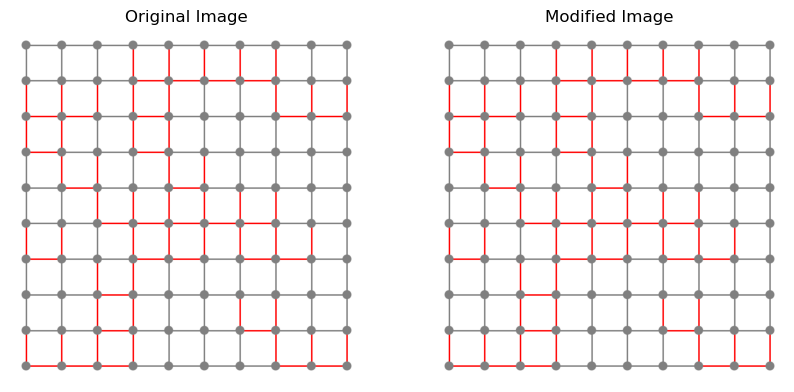

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('opening_result/opening_matrix_0.png')

# Convert the image to the HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define lower and upper bounds for red color in HSV
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])

# Create a mask for red color pixels
red_mask = cv2.inRange(hsv_image, lower_red, upper_red)

# Increase the intensity of red color pixels
image_copy = image.copy()
image_copy[np.where(red_mask)] += 0  # You can adjust the intensity increase as needed

# Display the modified image using matplotlib
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
plt.title("Modified Image")
plt.axis('off')

plt.show()


# Practice

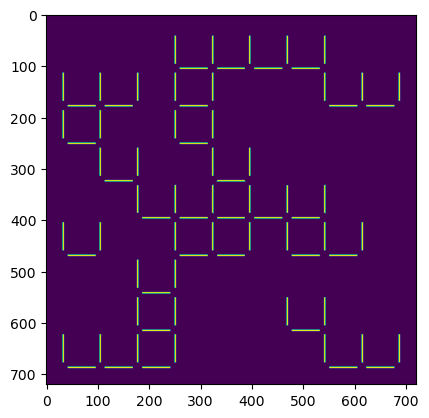

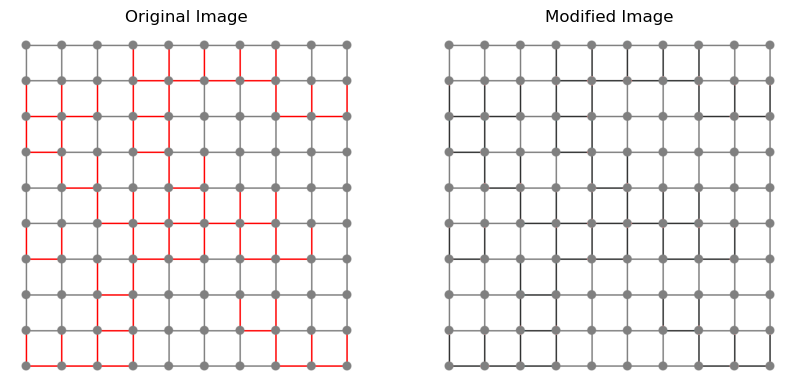

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('opening_result/opening_matrix_0.png')

# Convert the image to the HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define lower and upper bounds for red color in HSV
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])

# Create a mask for red color pixels
red_mask = cv2.inRange(hsv_image, lower_red, upper_red)
plt.imshow(red_mask)
plt.show()
# Increase the intensity of red color pixels
intensity_increase = 50
image_copy = image.copy()
image_copy[np.where(red_mask)] = np.clip(image_copy[np.where(red_mask)] + intensity_increase, 0, 255)

# Display the modified image using matplotlib
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
plt.title("Modified Image")
plt.axis('off')

plt.show()
